# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
# Put your imports here.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set global plot size
plt.rcParams['figure.figsize'] = 15, 5

import folium
import json
%matplotlib inline

from IPython.core.display import display, HTML

In [2]:
data_folder = 'D:/python_workspace/school/AppliedDataAnalysis/ADA2018-Homework/homework-2-gjems_rahm_vold_ada_hw2/02 - Visualisation/data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

### A)

In [3]:
data_cantons= json.load(open(data_folder + "ch-cantons.topojson.json"))
mymap = folium.Map(location=(47.0504799,8.3063498), tiles = "Stamen toner", zoom_start=7)
folium.TopoJson(data_cantons, 
                object_path='objects.cantons', 
                style_function=lambda x: {'color' : 'blue'}).add_to(mymap)

mymap

### B)

### Import the excel data 
We are only interested in the latest data (2017) and we skip the first 5 rows which are part of the excel file header.

In [4]:
data_communal = pd.read_excel(data_folder + "communes_pop.xls", sheet_name='2017', skiprows=5)
data_communal.head()

,Unnamed: 0,au 1er janvier,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,,au 31 décembre,Unnamed: 10,Unnamed: 11
0,Suisse 2),8419550.0,87381.0,66971.0,20410.0,681011.0,635063.0,45948.0,-1778.0,8484130.0,64580.0,0.767024
1,- Zürich,1487969.0,17070.0,11076.0,5994.0,120593.0,108666.0,11927.0,-1544.0,1504346.0,16377.0,1.100628
2,>> Bezirk Affoltern,52904.0,517.0,310.0,207.0,4501.0,3862.0,639.0,21.0,53771.0,867.0,1.638817
3,......0001 Aeugst am Albis,1977.0,10.0,7.0,3.0,129.0,165.0,-36.0,-3.0,1941.0,-36.0,-1.820941
4,......0002 Affoltern am Albis,11900.0,128.0,93.0,35.0,1239.0,1029.0,210.0,1.0,12146.0,246.0,2.067227


__*The first columns of the dataframe is the population count that we are interested in. We also remove the first line which contains popuation info about all switzerland and ignore the last 7 rows which are the excel sheet footer.*__


In [5]:
data_communal = data_communal.iloc[1:data_communal.shape[0]-7, [0, 1]]
data_communal.columns = ['name', 'population']
data_communal.head()

,name,population
1,- Zürich,1487969.0
2,>> Bezirk Affoltern,52904.0
3,......0001 Aeugst am Albis,1977.0
4,......0002 Affoltern am Albis,11900.0
5,......0003 Bonstetten,5435.0


Entries starting with - are cantoons and entries starting with '>>' are districts. 
We only want the communes, so we remove these entries.

In [6]:
data_communal = data_communal[data_communal.name.apply(lambda x: not(str(x).startswith('-') 
                                                                     or str(x).startswith('>>')))]

Plot a histogram of the canton population data: 

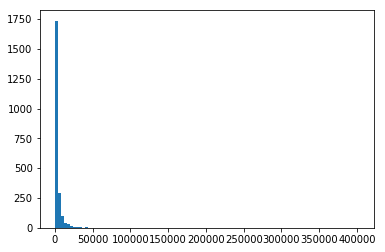

In [7]:
population = data_communal['population']
# Plot
bins = 100
pl1 = plt.hist(population, bins = bins)
plt.show()

__* The above plot is not very informative, we will have to split the data. However, the fact that most communes are quite small in swizerland can be observed in the plot above.*__

Let's use the describe function to get some information about our dataframe:

In [8]:
data_communal.describe()

,population
count,2240.000000
mean,3758.727679
std,12306.015472
min,14.000000
25%,670.500000
50%,1477.500000
75%,3604.500000
max,402762.000000


__*The output of the describe function above tells us that 50% of all communes have a population of 1477 or less.*__


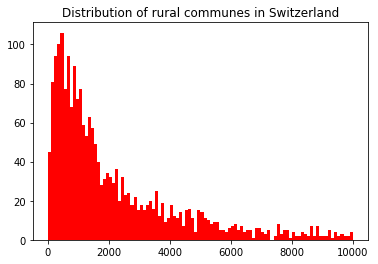

In [9]:
plt.hist(population[population < 10000], bins = bins, color='red')
plt.title("Distribution of rural communes in Switzerland")
plt.show()

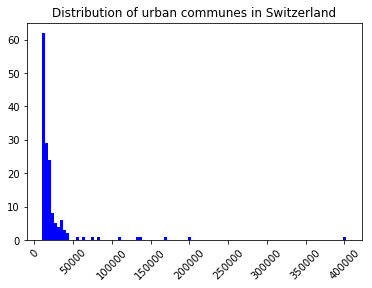

In [10]:
plt.hist(population[population >= 10000], bins = bins, color='blue')
plt.title("Distribution of urban communes in Switzerland")
plt.xticks(rotation=45)
plt.show()

__*Comparing the to histograms, we could conclude that cities with 100000 inhabitants (see below) are some kind of outliers in the second case, and in the first one, the data is following a very clear distribution (no outliers).*__

In [11]:
data_communal[["name", "population"]].sort_values("population", ascending=False).head(6)

,name,population
181,......0261 Zürich,402762.0
2321,......6621 Genève,198979.0
993,......2701 Basel,171017.0
1962,......5586 Lausanne,137810.0
377,......0351 Bern,133115.0
165,......0230 Winterthur,109775.0


__*Now some log-log plots to help us identify the power law of the data.*__

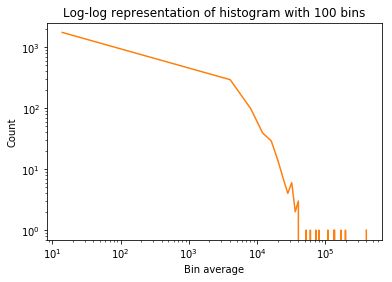

In [12]:
# log-log hist with small number of bins

# Here we use the hist just to extract the bins averages and their count
bins = 100
pl1 = plt.hist(population, bins = bins, visible=False)

plt.loglog(pl1[1][:-1], pl1[0], linewidth=1.5)
plt.title("Log-log representation of histogram with {} bins".format(bins))
plt.xlabel("Bin average")
plt.ylabel("Count")
plt.show()

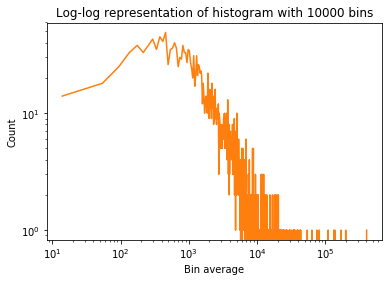

In [13]:
# Now with a huge number
bins = 10000

pl1 = plt.hist(population, bins = bins, visible=False)

plt.loglog(pl1[1][:-1], pl1[0])
plt.title("Log-log representation of histogram with {} bins".format(bins))
plt.xlabel("Bin average")
plt.ylabel("Count")
plt.show()

__* What we can read from the second histogram, is that the number of small bins is growing VERY fast when we vary their average in the x-axis. After around 2000 there are no bins with more than 10 samples in them, and after 20000 there are no bins with more than 1 sample! *__

__* This suggests that we are indeed dealing with some kind of a power law of our data. *__

__*
The tail of the histograms become more and more noicy the more bins we add. This happens because the number of samples in each bin becomes smaller which gives larger variance between bins. *__

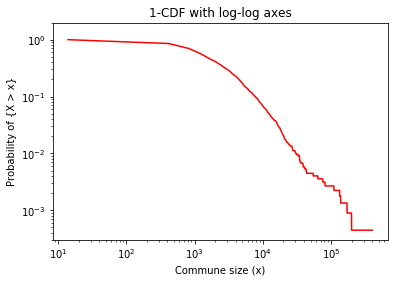

In [14]:
# And finally the log-log plot for t -> 1-CDF(t), where t is an average value of some bin from last hist

# Extract bins
bins = 1000
pl1 = plt.hist(population, bins = bins, visible=False)

# Get 1-CDF values
res = []
for i in range(len(pl1[1][:-1])):
    res.append(len(population[population > pl1[1][i]]))

    # Plot
plt.loglog(pl1[1][:-1], np.array(res)/max(res), c="r")
plt.title("1-CDF with log-log axes")
plt.ylabel("Probability of {X > x}")
plt.xlabel("Commune size (x)")
plt.ylim(3*10**(-4), 2)
plt.show()

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

### Import and cleaning of data set

In [15]:
df = pd.read_excel(data_folder + 'voters.xls', sheet_name='actuel (2014-2018)', header=[2])

# Set index to canton name
df = df.set_index('Unnamed: 0')
df.index.name = "canton"

# The dataframe has a few empty columns with titles containing the word "Unnamed", let's delete those.
df = df[df.filter(regex='^(?!Unnamed)').columns]

#First two lines contain junk
df = df.iloc[2:]

# We don't want the end of the file which is the document footer.
df = df.iloc[:30]

# There are also a few blank rows in the excel files which we need to remove
df = df[df.index.isnull() == False]

# Rreplace all nan values with 0, as in 0% votes.
df = df.fillna(0)

# remove paranthesis that is contained in some indexes and in some col
df.index = df.index.map(lambda x: x[:x.find(')') - 2].strip() if x.find(')') != -1 else x.strip())
df.columns = df.columns.map(lambda x: x[:x.find(')') - 2].strip() if x.find(')') != -1 else x.strip())

df.head()

,Année électorale,Participation,PLR,PDC,PS,UDC,Dém.,PLS,AdI,PEV,...,PSL,Lega,MCR,LS,JB,Front,Grut,Autres,K,Total
canton,,,,,,,,,,,,,,,,,,,,,
Zurich,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,0.0,0.0,0.0,4.271767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669707,0.0,100
Berne,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,0.0,0.0,0.0,6.172897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.912781,0.0,100
Lucerne,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,0.0,0.0,0.0,0.199143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036129,0.0,100
Uri,2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.428270,0.0,100
Schwytz,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,0.0,0.0,0.0,0.304428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.513578,0.0,100


Let's make a quick sanity check on the dataframe. There are 26 cantons in Switzerland and hence our dataframe
should have 26 rows

In [16]:
df.shape[0]

26

The index of the dataframe is the name of the canton, it should be unique since there are no two cantons with the same name.

In [17]:
df.index.is_unique

True

 Each row should sum up to 100!

In [18]:
vote_cols = df.iloc[:, 2:-1]
row_sums = np.sum(vote_cols, axis=1)
epsilon = 10e-6
rows = row_sums.apply(lambda x: x > 100 - epsilon and x < 100 + epsilon)
np.all(rows)

False

In [19]:
number_of_correct_rows = row_sums[rows==True].shape[0]
number_of_incorrect_rows = row_sums[rows==False].shape[0]
print("Number of rows which sum up to 100: " + str(number_of_correct_rows))
print("Number of rows which does not sum up to 100: " + str(number_of_incorrect_rows))

Number of rows which sum up to 100: 24
Number of rows which does not sum up to 100: 2


In [20]:
zero_rows = row_sums.apply(lambda x: x == 0)
print("Number of rows with a row sum of 0: " + str(rows[zero_rows].shape[0]))

Number of rows with a row sum of 0: 2


It appears that 24 rows in the file are complete while voting data from 2 canton is missing completly. 

The cantons where voting data is missing is:

In [21]:
df[df.apply(lambda x: x[2:-1].sum() < 10e-6,axis=1)]

,Année électorale,Participation,PLR,PDC,PS,UDC,Dém.,PLS,AdI,PEV,...,PSL,Lega,MCR,LS,JB,Front,Grut,Autres,K,Total
canton,,,,,,,,,,,,,,,,,,,,,
Appenzell Rh. Int.,2015.0,36.11126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…
Grisons,2018.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…


### A)

In this task and several others, we will need to color the 2 cantons with missing values black in order to indicate that data is missing for these two cantons. The following function will do just that and will be used throughout the assigment at several places.

In [22]:
def markCantonsWithMissingData(m, geo_json_data):
    folium.TopoJson(
    geo_json_data,
    object_path='objects.cantons',
    style_function=lambda feature: {
        'fillOpacity': 1.0 if(feature['id'] == 'AI' or feature['id'] == "GR") else 0.0,
        'fillColor' : 'black'
        }
    ).add_to(m)

In [23]:
df_voters = df.copy()

# We need to get the canton codes which is availible in cantons.csv
cantons = pd.read_csv(data_folder + '/cantons.csv', index_col='Canton of')

# The canton names in cantons.csv is in a different language compared to the canton names in df_voters.
# However, the order of the cantons are identical between the two sources, we can therefore just extract
# the canton code column and insert it as a new column in df_votes
df_voters['code'] = cantons['Code'].tolist()

# Create a folumn map and center it on Switzerland
m = folium.Map(location=[46.94809, 7.44744], zoom_start=7)

# Load overlay
geo_path = data_folder + r'ch-cantons.topojson.json' 
geo_json_data = json.load(open(geo_path))

# Remove the rows which correspond to the cantons with missing data
df_voters_tmp = df_voters.query("canton!='Grisons' and canton!='Appenzell Rh. Int.'")

# Add the overlay to the map
m.choropleth(geo_data=geo_json_data, 
             data=df_voters_tmp,
             columns=['code','UDC'],
             key_on='id',
             topojson='objects.cantons',
             fill_color='BuPu',
             legend_name='Amount of votes for UDC (%)')


# Add overlay in order to mark the cantons which has missing values
markCantonsWithMissingData(m, geo_json_data)

# Save map for later reuse
m.save('map_canton_porportions.html')

m

**Cantons colored black are cantons where data is missing (Girgioni and Appentzell innerrhoden)**


**It's easy to see in the above picture that UDC is more popular in the german speaking part compared to the french and italien speaking part. Ticino (which is the italian speaking canton) is the Canton where UDC has the lowest amount of voters. UDC seem to be more popular in the French compared to the Italian part but less popular than the german speaking part.**


### B)

#### Import and clean data

In [24]:
df_number_of_voters = pd.read_excel(data_folder + 'national_council_elections.xlsx', 
                                    sheet_name='2015', 
                                    skiprows=8)
df_number_of_voters.columns = ['canton', 'population', 'total_voters', 'participation']

# Remove footer from excel file
df_number_of_voters = df_number_of_voters.iloc[:26]

# Remove suffixes from canton names.
df_number_of_voters['canton'] = df_number_of_voters['canton'].map(lambda x: x[:x.find(')') - 2] if x.find(')') != -1 else x)

# Three cantons has a slightly different name in the df_number_of_voters compared to df_voters, let's rename them!
df_number_of_voters['canton'] = df_number_of_voters['canton'].apply(lambda x: 'St. Gall' if x == 'Saint-Gall' else x)
df_number_of_voters['canton'] = df_number_of_voters['canton'].apply(lambda x: 'Appenzell Rh. Ext.' if x == 'Appenzell Rh.-Ext.' else x)
df_number_of_voters['canton'] = df_number_of_voters['canton'].apply(lambda x: 'Appenzell Rh. Int.' if x == 'Appenzell Rh.-Int.' else x)

df_number_of_voters.head()

,canton,population,total_voters,participation
0,Zurich,907623.0,428837.0,47.248362
1,Berne,729203.0,357770.0,49.063155
2,Lucerne,271143.0,138096.0,50.931059
3,Uri,26414.0,15091.0,57.132581
4,Schwytz,102145.0,54857.0,53.705027


In order to get the total amount of votes for UDC, we need to join df_number_of_voters with df_voters

In [25]:
# Join with df_voters to get canton codes.
df_number_of_voters = df_number_of_voters.join(df_voters, on='canton', how='inner')

# Calculate the total amount of votes for UDC in each canton.
df_number_of_voters['number_of_votes_udc'] = df_number_of_voters['total_voters'] * (df_number_of_voters['UDC']/100)
df_number_of_voters['number_of_votes_udc'] = df_number_of_voters['number_of_votes_udc'].astype(int)

df_number_of_voters

,canton,population,total_voters,participation,Année électorale,Participation,PLR,PDC,PS,UDC,...,MCR,LS,JB,Front,Grut,Autres,K,Total,code,number_of_votes_udc
0,Zurich,907623.0,428837.0,47.248362,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,...,0.000000,0.0,0.0,0.0,0.0,0.669707,0.0,100,ZH,128750
1,Berne,729203.0,357770.0,49.063155,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,...,0.000000,0.0,0.0,0.0,0.0,0.912781,0.0,100,BE,95742
2,Lucerne,271143.0,138096.0,50.931059,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,...,0.000000,0.0,0.0,0.0,0.0,0.036129,0.0,100,LU,33302
3,Uri,26414.0,15091.0,57.132581,2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,...,0.000000,0.0,0.0,0.0,0.0,2.428270,0.0,100,UR,3629
4,Schwytz,102145.0,54857.0,53.705027,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,...,0.000000,0.0,0.0,0.0,0.0,1.513578,0.0,100,SZ,18165
5,Obwald,26244.0,15617.0,59.506935,2018.0,53.793314,17.174703,29.803630,15.090867,24.532303,...,0.000000,0.0,0.0,0.0,0.0,13.398497,0.0,100,OW,3831
6,Nidwald,30810.0,17971.0,58.328465,2018.0,54.921606,28.012430,26.750081,4.470053,25.916631,...,0.000000,0.0,0.0,0.0,0.0,1.446747,0.0,100,NW,4657
7,Glaris,26268.0,10890.0,41.457286,2018.0,29.489675,18.392812,9.400847,12.750408,25.275361,...,0.000000,0.0,0.0,0.0,0.0,1.803643,0.0,100,GL,2752
8,Zoug,74803.0,40200.0,53.741160,2014.0,42.939437,22.147887,26.783136,9.250912,23.631802,...,0.000000,0.0,0.0,0.0,0.0,1.579922,0.0,100,ZG,9499
9,Fribourg,196027.0,92462.0,47.167992,2016.0,39.302102,18.165508,23.707027,23.584309,19.717606,...,0.000000,0.0,0.0,0.0,0.0,3.973469,0.0,100,FR,18231


Plot the amount of voters of UDC in a folium map:

In [26]:
m = folium.Map(location=[46.94809, 7.44744], zoom_start=7)
geo_path = data_folder + r'ch-cantons.topojson.json' 
geo_json_data = json.load(open(geo_path))

# Remove the rows which correspond to the canton with missing values
df_number_of_voters_tmp = df_number_of_voters.query("canton!='Grisons' and canton!='Appenzell Rh. Int.'")

# Plot
m.choropleth(geo_data=geo_json_data, 
             data=df_number_of_voters_tmp,
             columns=['code','number_of_votes_udc'],
             key_on='id',
             topojson='objects.cantons',
             fill_color='BuPu',
             legend_name='Total number of votes for UDC')


# Add overlay in order to mark the cantons which has missing values
markCantonsWithMissingData(m, geo_json_data)

m

**Cantons colored black are cantons where data is missing (Girgioni and Appentzell innerrhoden)**

### C)

The first plot (the one that shows %) is better for cantonal parliament elections since it clearly displays 
the percentage of votes UDC got in each canton which is what matters in cantonal parliament elections.

None of maps are very informative in the case of national election with majority. The problem with the first map is that we only see porpotions of votes in each canton but nothing about the population of each canton. For instance, if one canton account for 90% of the total population of Switzerland, one party could get a high % of votes in only this canton and 0% in the rest and still win the election. This information is not reflected in the first plot. In order to make the first map more useful for national election with majority, it needs to be complemented with information about the total population of each canton. 

The issue with the second plot is that it says nothing about the total popluation of Switzerland and hence it's useless for someone who does not have this knowledge. If the total population of Switzerland would also be displayed in the map, then it would be more informative (assuming the reader of the map has basic math skills). However, it's still not ideal.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

### A)

In [27]:

def right_leaning(canton):
    right_lean = df_number_of_voters.loc[df_number_of_voters['code'] == canton, 'right_lean'].values[0]
    if right_lean > 0:
        return '#67a9cf'
    else:
        return '#ef8a62'

# Calculate the voteshare of PS
df_number_of_voters['number_of_votes_ps'] =  df_number_of_voters['total_voters'] * (df_number_of_voters['PS']/100)

# Calculate the right lean quantity
ps_votes = df_number_of_voters['number_of_votes_ps']
udc_votes = df_number_of_voters['number_of_votes_udc'] 
df_number_of_voters['right_lean'] = (udc_votes - ps_votes) / (ps_votes + udc_votes)
df_number_of_voters = df_number_of_voters.fillna(0)


# Display map
m = folium.Map(location=[46.94809, 7.44744], zoom_start=7)
geo_path = data_folder + r'ch-cantons.topojson.json' 
geo_json_data = json.load(open(geo_path))
folium.TopoJson(
    geo_json_data,
    object_path='objects.cantons',
    style_function=lambda feature: {
        'fillColor': right_leaning(feature['id']),
        'color' : 'black',
        'weight' : 2.0,
        'dashArray' : '5, 5',
        'fillOpacity': 0.7,

        }
).add_to(m)

# Add overlay in order to mark the cantons which has missing values
markCantonsWithMissingData(m, geo_json_data)

m

**You can clearly observe the röstigraben in the map. The german speaking part seem to be more right leaning compared to both the french and italian part of Switzerland. The only french speaking canton which has a positive right lean value is valais. The cantons colored in black are cantons where data is missing.**

### B)

We are going to import the 2010-2013 vote share data. We already have the 2014-2018 one from the previous tasks.

In [28]:
#data for 2014-2018 period
df1 = df_voters.copy()

#data for 2010-2013 period
df2 = pd.read_excel(data_folder + 'voters.xls', sheet_name='2010-2013', header=[2])
# Set correct index
df2 = df2.set_index('Unnamed: 0')
df2.index.name = "canton"

df2 = df2[df2.filter(regex='^(?!Unnamed)').columns]
#First two lines contain junk
df2 = df2.iloc[2:]
# We don't want the end of the file which is the document footer.
df2 = df2.iloc[:30]
# There are also a few blank rows in the excel files which we need to remove
df2 = df2[df2.index.isnull() == False]
# Rreplace all nan values with 0, as in 0% votes.
df2 = df2.fillna(0)

# remove paranthesis that is contained in some indexes and in some col
df2.index = df2.index.map(lambda x: x[:x.find(')') - 2].strip() if x.find(')') != -1 else x.strip())
df2.columns = df2.columns.map(lambda x: x[:x.find(')') - 2].strip() if x.find(')') != -1 else x.strip())

As can be seen, pre-processing of 2010-2013 was the same as in previous tasks where we pre-processed the 2014-2018 data. 

We are going to calculate the change in vote share for both parties.

In [29]:
# remove all columns that we don't need
# we leave the 'code' column in the first dataset since we are going to need it later for visualization
df1 = df1[['UDC', 'PS', 'code']]
df2 = df2[['UDC', 'PS']]

# merge two datasets (2018 and 2013 one)
df = pd.merge(df1, df2, on='canton', suffixes=['_2018', '_2013'])

# calculate the change in vote share 
# we multiply by 100 to get the percentage of the change in vote share
# (in range 0-100, where 100 means 100%)
df['UDC_change'] = ((df['UDC_2018'] - df['UDC_2013']) / df['UDC_2013']) * 100
df['PS_change'] = ((df['PS_2018'] - df['PS_2013']) / df['PS_2013']) * 100

# set Nan values to 0 
# (we must do this due to the two cantons for which we have no data)
df = df.fillna(0)

df.head()

,UDC_2018,PS_2018,code,UDC_2013,PS_2013,UDC_change,PS_change
canton,,,,,,,
Zurich,30.023215,19.716444,ZH,29.635552,19.317182,1.308102,2.066871
Berne,26.760869,22.328775,BE,26.621577,18.852832,0.523232,18.437243
Lucerne,24.115646,11.848915,LU,22.126508,10.964228,8.989840,8.068852
Uri,24.053191,12.984966,UR,24.629866,12.085318,-2.341368,7.444143
Schwytz,33.115090,12.925363,SZ,34.004523,12.381160,-2.615632,4.395413


We have the percentage of the change in vote share for each party.

Let's check the range of values for UDC.

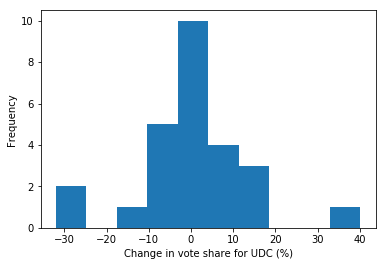

In [30]:
plt.hist(df['UDC_change'])
plt.xlabel('Change in vote share for UDC (%)')
plt.ylabel('Frequency')
plt.show()

As we can see, the maximum gain in vote share (compared to last elections) for UDC is 40%, and the worst loss in vote share for UDC is 30%, but in most cantons there is little change.

Now we can visualize the change in vote share for UDC for each canton.

In [31]:
# function for coloring the vote share change by canton
# VOTE SH. CHANGE | COLOR
#    -20% to -inf | red
#    -5% to -20%  | light red
#    -5% to +5%   | light yellow
#    +5% to 20%   | light green
#    +20% to inf  | green
def coloring_function(canton, party):
    # get vote share change
    vs_change = df.loc[df['code'] == canton, party].values[0]
    if vs_change < -20:
        return '#d7191c'
    elif vs_change < -5:
        return '#fdae61'
    elif vs_change < 5:
        return '#ffffbf'
    elif vs_change < 20:
        return '#a6d96a'
    else:
        return '#1a9641'

In [32]:
m = folium.Map(location=[46.94809, 7.44744], zoom_start=7)
geo_path = data_folder + r'ch-cantons.topojson.json' 
geo_json_data = json.load(open(geo_path))
folium.TopoJson(
    geo_json_data,
    object_path='objects.cantons',
    style_function=lambda feature: {
        'fillColor': coloring_function(feature['id'], 'UDC_change'),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5',
        'fillOpacity': 0.7,
        }
).add_to(m)

# Mark cantons with missing data
markCantonsWithMissingData(m, geo_json_data)

m

__color scheme__:
**<span style="background-color:black;">----<font color='#d7191c'> -20% to -inf <font color='#fdae61'> -20% to -5% <font color='#ffffbf'>-5% to 5% <font color='#a6d96a'>5% to 20% <font color='#1a9641'> 20% to inf <font color='#000000'>---</span>**   

This map nicely shows change in vote share for each canton. As can be seen, change in UDC vote share by canton is mixed. Looking at the map, you can say that UDC should focus more on the French and Italian-speakng cantons, since most of the loss in vote share happened there.

__However, if you compare this map to the map in task 2.A,__ you can see that the cantons in which UDC suffered worst loss (the French and Italian-speaking cantons) are actually the cantons where UDC generally has a low vote share. So even though they lost a bit of vote share there, it doesn't impact them so much considering their support in those cantons is small. UDC must choose: does it want to be a general Swiss party, or cater mostly to the German speaking part? The data tells us that for now, the latter is true.

Let's check the range of values for PS.

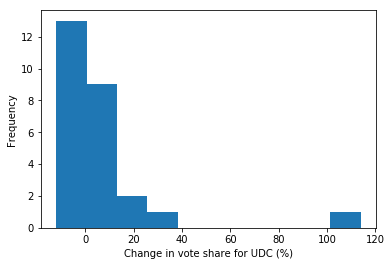

In [33]:
plt.hist(df['PS_change'])
plt.xlabel('Change in vote share for UDC (%)')
plt.ylabel('Frequency')
plt.show()

As can be seen, PS suffered a minor loss (up to -10%) of vote share change in a lot of cantons, but also got some big increase in a minority of cantons.

In [34]:
m = folium.Map(location=[46.94809, 7.44744], zoom_start=7)
geo_path = data_folder + r'ch-cantons.topojson.json' 
geo_json_data = json.load(open(geo_path))
folium.TopoJson(
    geo_json_data,
    object_path='objects.cantons',
    style_function=lambda feature: {
        'fillColor': coloring_function(feature['id'], 'PS_change'),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5',
        'fillOpacity': 0.7,
        }
).add_to(m)


# Add overlay in order to mark the cantons which has missing values
markCantonsWithMissingData(m, geo_json_data)

m

__color scheme__:
**<span style="background-color:black;">----<font color='#d7191c'> -20% to -inf <font color='#fdae61'> -20% to -5% <font color='#ffffbf'>-5% to 5% <font color='#a6d96a'>5% to 20% <font color='#1a9641'> 20% to inf <font color='#000000'>---</span>**     

As can be seen, PS made most gain the central cantons, while it suffered losses in the most western cantons. On the other hand, in the east, the change was minimal.

__To understand this map better__, let's also show the vote share of PS in the 2014-2018 election by each canton. 

In [35]:
display(HTML('<iframe src=' + 'map_canton_porportions.html' + ' width=100% height=600></iframe>'))

Now that we have both the information about which cantons usually vote for PS, and in what cantons they made gains or suffered losses, we can concurr:
- Cantons in which PS suffered gains and losses are the cantons __where PS usually has a large vote share__. We can guess that in some of those cantons PS member did something good so more people started to vote for it, while in some cantons they did bad so less people wanted to vote for it.
- Cantons in which PS usually has __a small vote share__ did not change their opinion very much; considering PS is marginal in those cantons, there was nothing to be satisfied or dissatisfied about.


<font color='red'>
Thank you for reading !